**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [1]:
from IPython.display import Video

Video("forest_fire.mp4")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [3]:
EMPTY, TREE, BURN = 0, 1, 2

In [4]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [5]:
def fire(data):
    nbhd = np.array([[-1,-1],[0,-1],[1,-1],[-1,0],[1,0],[-1,1],[0,1],[1,1]])
    trim = data[1:(n-1),1:(n-1)]
    new = trim.copy()
    new[(trim == 2)] = 0
    new[(trim == 0) & (np.random.uniform(size = (n-2,n-2))<p)] = 1
    new[(trim == 1) & (np.random.uniform(size = (n-2,n-2))<f)] = 2
    masks = np.zeros((8,n-2,n-2)); i = 0
    for dx,dy in nbhd:
        temp = data[(1+dx):(n-1+dx),(1+dy):(n-1+dy)]
        masks[i,:,:] = temp
        i += 1 
    new[(trim == 1) & (masks == 2).any(axis = 0)] = 2
    result = np.pad(new,1,mode = "constant", constant_values = 0)
    return result

In [6]:
%%time
sim = np.zeros((steps,n,n),dtype="int32")
for i in range(n-1):
    sim[i+1,:,:] = fire(sim[i,:,:])
# Your code to generate the `sim` array here.

CPU times: user 452 ms, sys: 16 ms, total: 468 ms
Wall time: 467 ms


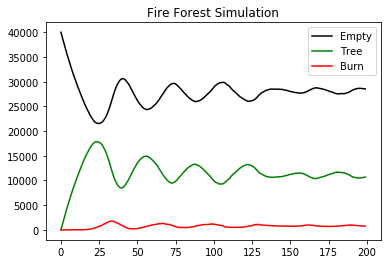

In [7]:
# Your code to make the first plot here
mask = sim != 0
empty = np.ma.masked_array(sim, mask).count(axis = (1,2))
mask = sim != 1
tree = np.ma.masked_array(sim, mask).count(axis = (1,2))
mask = sim != 2
burn = np.ma.masked_array(sim, mask).count(axis = (1,2))
x = range(200)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, empty, "black", label= 'Empty')
ax.plot(x, tree, "green", label= 'Tree')
ax.plot(x, burn, "red", label = "Burn")
plt.title('Fire Forest Simulation')
ax.legend()
plt.show()

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [8]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [9]:
%%time

HTML(ani.to_jshtml())

CPU times: user 28.5 s, sys: 27.8 s, total: 56.3 s
Wall time: 18.8 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```